# **PREDICT SURVIVABILITY ON THE TITANIC (version 3)**
### This notebook is used to solve the question of survivabilty probability on the Titanic.
### This is a Kaggle challenge and test and train data is provided from Kaggle and public data.
###### Robert M. Taylor, PhD
###### 20190305

## **A. First, I need to import the packages I'll need and get the data...**

In [1]:
#for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('/Users/rmtaylor/Desktop/School/Titanic ML Challenge/train.csv')
test_df = pd.read_csv('/Users/rmtaylor/Desktop/School/Titanic ML Challenge/test.csv')
combine_df = [train_df, test_df]

## **B. Next, I'll look at the training set to learn about the data (i.e. columns, values, null values, missing values, etc).**
##### __Note:__ If possible, I will not look at or examine the test_df at all. I don't want to bias my analysis of the test_df.

In [3]:
#What are the columns in the df?

print (train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#let's look at the data table to see what it looks like and what values are categorical and numerical.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### **What I've learned so far:**
##### 1) column names, format of data
#### Numerical Values:
##### 2) Continous: Age, Fare. 
##### 3) Discrete: SibSp, Parch
#### Categorical Values:
##### 4) Categorical: Survived, Sex, and Embarked. 
##### 5) Ordinal: Pclass
#### Mixed Values:
##### 6) Ticket and Cabin


#### **I'll now look to see how many records there are...**


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### **I've now also learned that:**
##### 7) There are 891 passengers in the training data (remeber that indexing starts at "0"
##### 8) We can see the "Name" column could have errors due to different formatting (i.e. "Carrie")

#### **Now I'll look at the dataframe information a different way...**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### **New insights:**
- Confirms there are 891 passengers
- Age and Cabin are missing lots of values
- Columns can not be null
- We see which columns are int, float, and object and we see how many of each (5, 2, and 5, respectively)

#### **Let's look at some basic statistics about the data...**

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### We now see that 
- There was an average 38.4% survival rate
- Age ranged from babies to 80 years old, with the average age being 29 years old.
- Fares ranged from free to 512.33 (I will assume this is in dollars) The average fare was $32.20 
- The mean of the Pclass shows most individuals were in 2nd and 3rd classes


## **C. Next, I'll look at possible correlations between the columns and survival...**

In [8]:
# Correlation between survival and Pclass
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- We see a strong correlation between survival and class

In [9]:
# Correlation between survival and Sex
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- Females were MUCH more likely to survive, compared with men

In [10]:
# Correlation between survival and SibSp
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- The more Siblings/Spouses the person had on the ship = the less likely they were to survive

In [11]:
# correlation between survival and Parch
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- It appears that families of 3 and individuals traveling by themselves had the highest likelihood of survival

#### !! Age and Fare will be a little different to compare because they are **continuous numerical values**. 
#### If we compared like the others above, the list would be long due to the numerous different values of ages and fares. We should try to put the ages and fares into bins to 
#### graph and compare them.

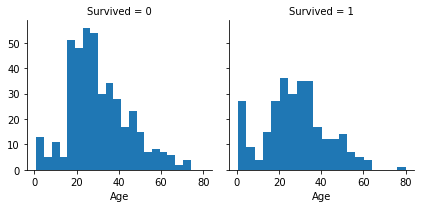

In [12]:
graph = sns.FacetGrid(train_df, col="Survived")
graph.map(plt.hist, 'Age', bins=20)

From the histograms, we can see that:
- the youngest and oldest had higher survival rates
- The ~ 18-30 year old range had the highest mortality

### Let's try this now with the Fare

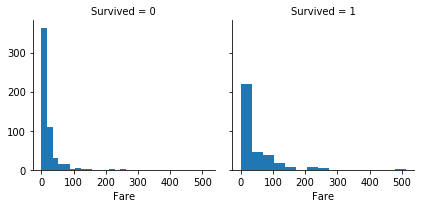

In [13]:
ax = plt.subplot(111)
ods.deaths_per_capita.plot(
kind='bar',
figsize=(12,3),
title="Opioid-related deaths per capita",
)
ax.axis('off')
for i, x in enumerate(ods['Abbrev']):
    ax.text(i-1 + 0.7, 0, x, rotation='45')

- We can obviously see that those who paid the least for tickets had the highest probability of death.

#### We can also look at how survival is broken down into Pclass by age

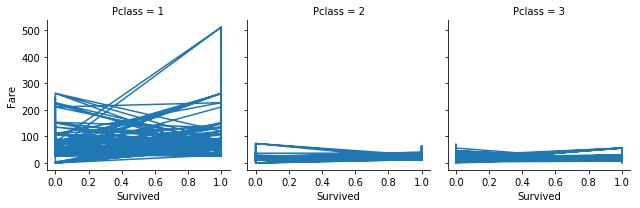

In [14]:
g = sns.FacetGrid(train_df, col="Pclass")
g.map(plt.plot, "Survived", "Fare")

- It looks like Fare is not a determinant

#### Pclass 1 does however look like fare might be involved... let's look another way

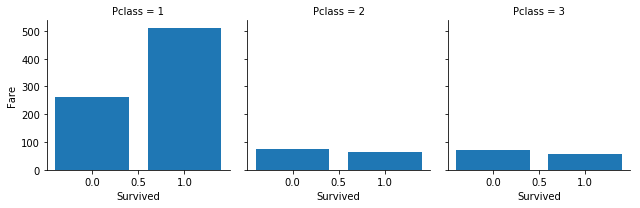

In [15]:
g = sns.FacetGrid(train_df, col="Pclass")
g.map(plt.bar, "Survived", "Fare")

- The bar graphs do seem to show that Pclass 1 survival is correlated with Fare while the other 2 classes are not

#### What about Embarked vs. Fare?

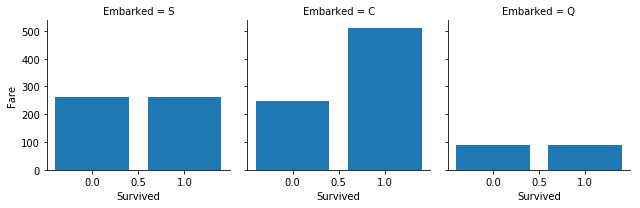

In [16]:
g = sns.FacetGrid(train_df, col="Embarked")
g.map(plt.bar, "Survived", "Fare")

### UPDATE: Let's look at the Cabin Feature

#### Going through this problem a 2nd time, I think I'd like to look more at the Cabin feature to
#### see if there is a way to incorporate it.  My thoughts are that people on certain decks and in certain parts
#### of the ship (bow, stern, etc.) might have had different probabilities of survival. 

##### So, Let's first look at the values of the Cabin feature...

In [17]:
print (train_df.Cabin.values)

[nan 'C85' nan 'C123' nan nan 'E46' nan nan nan 'G6' 'C103' nan nan nan
 nan nan nan nan nan nan 'D56' nan 'A6' nan nan nan 'C23 C25 C27' nan nan
 nan 'B78' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan 'D33' nan 'B30' 'C52' nan nan nan nan nan 'B28' 'C83' nan
 nan nan 'F33' nan nan nan nan nan nan nan nan 'F G73' nan nan nan nan nan
 nan nan nan nan nan nan nan 'C23 C25 C27' nan nan nan 'E31' nan nan nan
 'A5' 'D10 D12' nan nan nan nan 'D26' nan nan nan nan nan nan nan 'C110'
 nan nan nan nan nan nan nan 'B58 B60' nan nan nan nan 'E101' 'D26' nan
 nan nan 'F E69' nan nan nan nan nan nan nan 'D47' 'C123' nan 'B86' nan
 nan nan nan nan nan nan nan 'F2' nan nan 'C2' nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan 'E33' nan nan nan 'B19' nan nan nan 'A7' nan
 nan 'C49' nan nan nan nan nan 'F4' nan 'A32' nan nan nan nan nan nan nan
 'F2' 'B4' 'B80' nan nan nan nan nan nan nan nan nan 'G6' nan nan nan
 'A31' nan nan nan nan nan 'D36' nan nan 'D15'

In [18]:
temp = train_df.Cabin.unique().tolist()

In [19]:
print (temp)

[nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B

We can see that:
- there are Cabin values ranging from A-G
- there are a lot of "not a number" (nan) values
- there are several strange values which include (D, T, 1)

# E. Now, let's wrangle the data!
- We've seen some clear correlations between Pclass, Sex, and SibSp

### 1. Correcting and dropping features

### UPDATE: VERSION 3
### In this version, instead of dropping the name column (as I've done in earlier versions), I will extract the "Title" from the name if any and use that as a feature as well. 
### Since it is clear that Pclass had a large effect on survival, it seems useful to extract the title, as many titles can be correlated with greater wealth/class.

By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin and Ticket features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [20]:
print("Before", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine_df = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

- By using the "shape" method, we can see that there were 2 columns successfully dropped from each dataframe 


#### Looking again, we can probably also drop the Name from both data sets and PassengerId from the training data set 



In [21]:
print("Before", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

train_df = train_df.drop(['PassengerId'], axis=1)
combine_df = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape


Before (891, 11) (418, 10) (891, 11) (418, 10)


('After', (891, 10), (418, 10), (891, 10), (418, 10))

### Here is where I'm adding in the "Title" feature by extracting from the "Name" feature and then deleting the "Name" column.

In [22]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rare": 6}

for dataset in combine_df:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine_df = [train_df, test_df]

In [23]:
# Correlation between survival and Cabin
train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
2,3,0.793651
1,2,0.702703
3,4,0.575000
4,5,0.428571
5,6,0.312500
0,1,0.156673


In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,3
2,1,3,female,26.0,0,0,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,53.1000,C123,S,3
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [25]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
886,0,2,male,27.0,0,0,13.00,NaN,S,6
887,1,1,female,19.0,0,0,30.00,B42,S,2
888,0,3,female,NaN,1,2,23.45,NaN,S,2
889,1,1,male,26.0,0,0,30.00,C148,C,1
890,0,3,male,32.0,0,0,7.75,NaN,Q,1


- We can now see that we have condensed down our data 
- by looking at the head of the df we can see how our data/table looks now
- by looking at the tail, we can see that we still have the correct number of passengers

### UPDATE 2: 
### Version 1: I dropped the Cabin feature 
### Version 2: I changed to ordianal values by stating  "1" if they had a cabin number and "0" if they didn't have a cabin number.
### Version 3: In this version, I'm going to fill the nan values with 0 and change the Letter in the cabin number (specifies deck) to ordinal numbers. I will then make this a new feature called "Deck" and delete the "Cabin" feature.

In [26]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in combine_df:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,male,22.0,1,0,7.2500,S,1,8
1,1,1,female,38.0,1,0,71.2833,C,3,3
2,1,3,female,26.0,0,0,7.9250,S,2,8
3,1,1,female,35.0,1,0,53.1000,S,3,3
4,0,3,male,35.0,0,0,8.0500,S,1,8


##### Let's look at the correlation between Deck and Survived now, since we didn't have a way to before...

In [27]:
# Correlation between survival and Cabin
train_df[["Deck", "Survived"]].groupby(["Deck"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Deck,Survived
4,4,0.757576
5,5,0.750000
2,2,0.744681
6,6,0.615385
3,3,0.593220
7,7,0.500000
1,1,0.466667
8,8,0.299854
0,0,0.000000


### 2. Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. 

Let us start by converting Sex feature to a new feature called Gender where **female=1 and male=0**.

In [28]:
for dataset in combine_df:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,22.0,1,0,7.2500,S,1,8
1,1,1,1,38.0,1,0,71.2833,C,3,3
2,1,3,1,26.0,0,0,7.9250,S,2,8
3,1,1,1,35.0,1,0,53.1000,S,3,3
4,0,3,0,35.0,0,0,8.0500,S,1,8


### 3. Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. 
We will first do this for the **Age** feature.

We will use the following method to complete a numerical continuous feature:

Method: More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

##### Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.


In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

##### Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [30]:
for dataset in combine_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,22,1,0,7.2500,S,1,8
1,1,1,1,38,1,0,71.2833,C,3,3
2,1,3,1,26,0,0,7.9250,S,2,8
3,1,1,1,35,1,0,53.1000,S,3,3
4,0,3,0,35,0,0,8.0500,S,1,8


##### Let us create Age bands and determine correlations with Survived.

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 10)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


##### Let us replace Age with ordinals based on these bands.

In [32]:
for dataset in combine_df:    
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 80), 'Age'] = 9
    dataset.loc[ dataset['Age'] > 80, 'Age']
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,AgeBand
0,0,3,0,2,1,0,7.2500,S,1,8,"(16.0, 24.0]"
1,1,1,1,4,1,0,71.2833,C,3,3,"(32.0, 40.0]"
2,1,3,1,3,0,0,7.9250,S,2,8,"(24.0, 32.0]"
3,1,1,1,4,1,0,53.1000,S,3,3,"(32.0, 40.0]"
4,0,3,0,4,0,0,8.0500,S,1,8,"(32.0, 40.0]"
5,0,3,0,3,0,0,8.4583,Q,1,8,"(24.0, 32.0]"
6,0,1,0,6,0,0,51.8625,S,1,5,"(48.0, 56.0]"
7,0,3,0,0,3,1,21.0750,S,4,8,"(-0.08, 8.0]"
8,1,3,1,3,0,2,11.1333,S,3,8,"(24.0, 32.0]"
9,1,2,1,1,1,0,30.0708,C,3,8,"(8.0, 16.0]"


##### We can now remove the AgeBand category

In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine_df = [train_df, test_df]

In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,2,1,0,7.2500,S,1,8
1,1,1,1,4,1,0,71.2833,C,3,3
2,1,3,1,3,0,0,7.9250,S,2,8
3,1,1,1,4,1,0,53.1000,S,3,3
4,0,3,0,4,0,0,8.0500,S,1,8


### 4. Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

**Note:** the "+1" in the code below is to account for the passenger (i.e. SibSp + Parch + individual)

In [35]:
for dataset in combine_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone

In [36]:
for dataset in combine_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.
### UPDATE: VERSION 3. 
### I decided to not drop the Parch, SibSp, and FamilySize features as I previously had. I felt this might capture more of the data. It did increase my best predictions below. 

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone
0,0,3,0,2,1,0,7.2500,S,1,8,2,0
1,1,1,1,4,1,0,71.2833,C,3,3,2,0
2,1,3,1,3,0,0,7.9250,S,2,8,1,1
3,1,1,1,4,1,0,53.1000,S,3,3,2,0
4,0,3,0,4,0,0,8.0500,S,1,8,1,1


We can also create an artificial feature by combining age and Pclass

In [38]:
for dataset in combine_df:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(5)

,Age*Class,Age,Pclass
0,6,2,3
1,4,4,1
2,9,3,3
3,4,4,1
4,12,4,3


### UPDATE: VERSION 3
### 1. I decided to make a new feature combining Pclass and Deck.
### 2. I decided to make a new feature combining Title and Age

In [39]:
# Make Deck * Class feature
for dataset in combine_df:
    dataset['DeckClass'] = dataset.Deck * dataset.Pclass

train_df.loc[:, ['DeckClass', 'Deck', 'Pclass']].head(5)

,DeckClass,Deck,Pclass
0,24,8,3
1,3,3,1
2,24,8,3
3,3,3,1
4,24,8,3


In [40]:
train_df[['DeckClass', 'Deck', 'Pclass', 'Survived']].groupby(['DeckClass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,DeckClass,Deck,Pclass,Survived
9,15,5.000000,3.000000,1.000000
8,12,6.000000,2.000000,0.875000
4,4,4.000000,1.000000,0.758621
7,10,5.000000,2.000000,0.750000
2,2,2.000000,1.000000,0.744681
5,5,5.000000,1.000000,0.720000
3,3,3.000000,1.000000,0.593220
6,8,7.636364,1.090909,0.500000
12,21,7.000000,3.000000,0.500000
1,1,1.000000,1.000000,0.466667


In [41]:
# Make Title * Age feature
for dataset in combine_df:
    dataset['TitleAge'] = dataset.Title * dataset.Age

train_df.loc[:, ['TitleAge', 'Title', 'Age']].head(5)

,TitleAge,Title,Age
0,2,1,2
1,12,3,4
2,6,2,3
3,12,3,4
4,4,1,4


In [42]:
train_df[['TitleAge', 'Title', 'Age', 'Survived']].groupby(['TitleAge'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,TitleAge,Title,Age,Survived
12,14,2.000000,7.000000,1.000000
11,12,3.000000,4.093023,0.860465
14,18,3.461538,5.538462,0.846154
16,21,3.000000,7.000000,0.800000
0,0,3.037037,0.000000,0.666667
6,6,2.075000,3.475000,0.625000
13,15,3.095238,4.904762,0.619048
20,36,6.000000,6.000000,0.600000
9,9,2.851852,3.444444,0.592593
8,8,1.666667,5.333333,0.583333


### 5. Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [43]:
common_port = train_df.Embarked.dropna().mode()[0]
common_port

'S'

In [44]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_port)

#### Now that we have filled in the missing data into "Embarked", we can now change the categorical values to numeric values as we did for "Sex" in part E.2 above

In [45]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,Age*Class,DeckClass,TitleAge
0,0,3,0,2,1,0,7.2500,3,1,8,2,0,6,24,2
1,1,1,1,4,1,0,71.2833,1,3,3,2,0,4,3,12
2,1,3,1,3,0,0,7.9250,3,2,8,1,1,9,24,6
3,1,1,1,4,1,0,53.1000,3,3,3,2,0,4,3,12
4,0,3,0,4,0,0,8.0500,3,1,8,1,1,12,24,4


### 6. Quick completing and converting a numeric feature

We can now complete the Fare feature for a single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

We want to meet the requirement of a model algorithm to operate on non-null values.

We will:
1. Fill in the null value
2. Creat a "FareBand" like we did for "Age" above.
3. We may also want round off the fare to two decimals as it represents currency.

**Note** "cut" is for continuous numbers and "qcut" is for non-continuous

In [46]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,Age*Class,DeckClass,TitleAge
0,892,3,0,4,0,0,7.8292,2,1,8,1,1,12,24,4
1,893,3,1,5,1,0,7.0000,3,3,8,2,0,15,24,15
2,894,2,0,7,0,0,9.6875,2,1,8,1,1,14,16,7
3,895,3,0,3,0,0,8.6625,3,1,8,1,1,9,24,3
4,896,3,1,2,1,1,12.2875,3,3,8,3,0,6,24,6


2a. Creat a "FareBand"

In [47]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


2b. Convert Fare feature to ordinal values using FareBand, and then drop the FareBand column

In [48]:
for dataset in combine_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine_df = [train_df, test_df]
    
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,Age*Class,DeckClass,TitleAge
0,0,3,0,2,1,0,0,3,1,8,2,0,6,24,2
1,1,1,1,4,1,0,3,1,3,3,2,0,4,3,12
2,1,3,1,3,0,0,1,3,2,8,1,1,9,24,6
3,1,1,1,4,1,0,3,3,3,3,2,0,4,3,12
4,0,3,0,4,0,0,1,3,1,8,1,1,12,24,4


In [49]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,Age*Class,DeckClass,TitleAge
0,892,3,0,4,0,0,0,2,1,8,1,1,12,24,4
1,893,3,1,5,1,0,0,3,3,8,2,0,15,24,15
2,894,2,0,7,0,0,1,2,1,8,1,1,14,16,7
3,895,3,0,3,0,0,1,3,1,8,1,1,9,24,3
4,896,3,1,2,1,1,1,3,3,8,3,0,6,24,6


# F. Model, Predict, and Solve! 
Now we are ready to train a model and predict the required solution. 

There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. 

Our problem is a classification and regression problem. 
We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...).
We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. 

With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [50]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 14), (891,), (418, 14))

### 1. Logistic Regression 
Logistic Regression is a useful model to run early in the workflow. 

Measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [51]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\rmtaylor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82.27

We can use Logistic Regression to validate our assumptions and decisions. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and 
negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [52]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.288499
7,Title,0.836371
0,Pclass,0.544427
5,Fare,0.188401
8,Deck,0.102329
11,Age*Class,0.011733
4,Parch,-0.054846
2,Age,-0.078337
13,TitleAge,-0.121744
6,Embarked,-0.171989


### 2. Support Vector Machines

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm 
builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [53]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\rmtaylor\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


86.98

### 3. k-Nearest Neighbors (k-NN)

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression.

A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.99

### 4. Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions 
between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [55]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

### 5. Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers 
(functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). 

It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining 
a set of weights with the feature vector. 

The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [56]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\rmtaylor\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


77.55

In [57]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\rmtaylor\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


82.04

In [58]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\rmtaylor\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


71.72

### 6. Decision Tree

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). 

Tree models where the target variable can take a finite set of values are called classification trees;
in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.48

### 7. Random Forests

The next model Random Forests is one of the most popular.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, 
that operate by constructing a multitude of decision trees (n_estimators=100) at training time 
and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
YY_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.48

### 8. Neural Network

Artificial neural networks (ANN) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains.[1] The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs.[2] 

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes.
For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, 
where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. 

There are many ways to choose these numbers, but for simplicity we will choose 7 layers with 70 neurons along with 1000 max iterations.

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70,70,70,70,70),max_iter=1000)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, Y_train)
acc_mlp = round(mlp.score(X_train, Y_train) * 100, 2)
acc_mlp

88.89

### 9. Relevance Vector Machines or Automatic Relevance Determination (ARD)

ARDRegression is very similar to Bayesian Ridge Regression, but can lead to sparser weights. ARDRegression drops the assumption of the Gaussian being spherical.

Instead, the distribution is assumed to be an axis-parallel, elliptical Gaussian distribution.

In [63]:
from sklearn.linear_model import ARDRegression
ard = ARDRegression()
ard.fit(X_train, Y_train)
Y_pred = ard.predict(X_test)
ard.score(X_train, Y_train)
acc_ard = round(ard.score(X_train, Y_train) * 100, 2)
acc_ard

43.03

# G. Model Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. 

While both Decision Tree and Random Forest score the same, the Random Forest corrects for decision trees' habit of overfitting to their training set. 

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Neural Network', 'ARD Regression'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_mlp, acc_ard]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,92.48
8,Decision Tree,92.48
9,Neural Network,88.89
1,KNN,87.99
0,Support Vector Machines,86.98
2,Logistic Regression,82.27
7,Linear SVC,82.04
5,Perceptron,77.55
4,Naive Bayes,77.33
6,Stochastic Gradient Decent,71.72


# Hyper Parameter Tuning

In [65]:
# Random Forest Classifier Parameters tunning 
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train, Y_train)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   14.0s finished


0.8271604938271605


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Apply the estimator from the tuning above...

Important features
____________________________________________________________
92.48


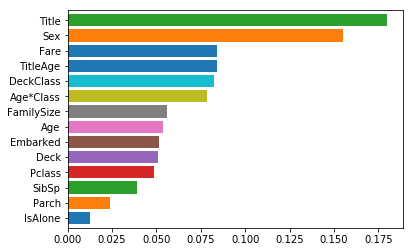

In [66]:
# Random Forests
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

# H. Reporting the results

If I wanted to submit this as my challenge submission, I would now do this...

In [68]:
submission4 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf
    })

submission4.to_csv('/Users/rmtaylor/Titanic/submission4.csv', index=False)